# Atividade 5 EQ024: Tecnologias de Fluidização
 - Determinar as velocidades de mínima fluidização de mistura e a velocidade completa de fluidização para partículas heterogêneas considerando seu processo composto de partículas binárias (agrupar as partículas em dois tamanhos) e polidispersas.
 - Determinar as velocidades de mínima fluidização e terminal para cada tamanho de partícula.
 - Comparar com os resultados obtidos na atividade 03, para partículas homogêneas.

[Resultados](#Resultados) Resultados

In [ ]:
import os
os.system('pip install numpy matplotlib scipy pandas')

## Aluno: João Eduardo Levandoski

In [235]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import pandas as pd

# Curva
### Gerador de distribuição aleatória, baseada na curva normal

In [236]:
numero_peneiras = 7 #Escolhendo o número de peneiras a ser utilizadas
razao = (2)**(1/2) #Escolhendo a razão entre os diâmetros das peneiras Raiz quadrada
abertura_1_penei = 6000 #Abertura da primeira peneira em microns 
media_dia = 4000 #Usando a media da distribuição normal,
                 #baseada no dado fornecido pela literatura
massa_total = 5680 #gramas 
var = 0.3 #Uma variação da curva normal para gerar os dados

In [237]:
random.seed(10)
dist_norm = []
for _ in range(int(massa_total)):
    dist_norm.append(random.normalvariate(media_dia,
                                          media_dia*var))

# Distribuição binária

In [238]:
numero_peneiras = 7 #Escolhendo o número de peneiras a ser utilizadas
razao = (2)**(1/2) #Escolhendo a razão entre os diâmetros das peneiras Raiz quadrada
abertura_1_penei = 6000 #Abertura da primeira peneira em microns 
media_dia1 = 5700 #Usando a media da distribuição normal,
                 #baseada no dado fornecido pela literatura
var1 = 0.05 #Uma variação da curva normal para gerar os dados
media_dia2 = 2700
massa_total = 5680 #gramas 
var2 = 0.2 #Uma variação da curva normal para gerar os dados

In [239]:
random.seed(10)
dist_norm = []
for _ in range(int(massa_total/2)):
    dist_norm.append(random.normalvariate(media_dia1,
                                          media_dia1*var1))
    dist_norm.append(random.normalvariate(media_dia2,
                                          media_dia2*var2))

# Tamanho das peneiras escolhidas em Microns

In [240]:
peneiras_total = [
    6680, #Mesh 3
    4699, #Mesh 4
    3327, #Mesh 6
    2362, #Mesh 8
    1651, #Mesh 10
    1168, #Mesh 14
    833,  #Mesh 20
    589,  #Mesh 28
    0     #Fundo
]

In [241]:
peneiras_menor = [ #Usadas no diâmetro menor
    3327, #Mesh 6
    2362, #Mesh 8
    1651, #Mesh 10
    1168, #Mesh 14
    833,  #Mesh 20
    589,  #Mesh 28
    0     #Fundo
]

In [242]:
peneiras_maior = [ #Usadas no diâmetro maior
    9510, #Mesh 3/8
    8000, #Mesh 5/16
    6680, #Mesh 3
    4699, #Mesh 4
    3327,
    0     #Fundo
]

In [243]:
# peneiras = peneiras_maior
peneiras = peneiras_menor
# peneiras = peneiras_total

peneiras = np.asarray(peneiras, dtype='int')

In [244]:
for i in range(len(peneiras)-2):
    print(f'Razão entre a peneira {peneiras[i]:5} e a\
    peneira {peneiras[i+1]:5}: {peneiras[i]/peneiras[i+1]:.4}')

Razão entre a peneira  3327 e a    peneira  2362: 1.409
Razão entre a peneira  2362 e a    peneira  1651: 1.431
Razão entre a peneira  1651 e a    peneira  1168: 1.414
Razão entre a peneira  1168 e a    peneira   833: 1.402
Razão entre a peneira   833 e a    peneira   589: 1.414


Usando a distribuição gerada acima e as peneiras selecionadas       
fazemos a classificação das partículas   
A célula abaixo salva em um dicionário a classificação,    
e calcula o diâmetro médio de cada peneira $\frac{Di_{sup}}{Di_{inf}}$

In [245]:
penei = {} #Criando um dicionário com os dados 
bins = [] #Será usado como base para distribuição do histograma
d_i = [None, ]
lista =[]
itens = 0

penei.update({str(peneiras[0]): []})
            
for j in range(len(peneiras)-1):
    lista =[]
    for i in dist_norm:
        if peneiras[j] > i >=peneiras[j+1]:
            lista.append(i)
            itens += 1
    bins.append(peneiras[j+1])
    d_i += [(peneiras[j] + peneiras[j+1])/2]        
    penei.update({str(peneiras[j+1]): lista})
    
penei[str(peneiras[-1])] = []

A variável `diametro_inferior` contém o diâmetro                            
da peneira onde a massa de partículas fica retida.                       
A variável `massa_retida` contém a massa retida em cada uma das peneiras.    

`x_i`: Fração mássica por peneira.   
`X_i`: Fração mássica acumuladada por peneira.


In [246]:
diametro_inferior = []
massa_retida = []
for nome in penei:
    diametro_inferior.append(int(nome))
    massa_retida.append(len(penei[nome]))

itens = max(np.cumsum(massa_retida))

In [247]:
# massa_retida = [0, 1457, 2556, 1090, 359, 101, 23, 10, 0]

In [248]:
diametro_inferior = np.asarray(diametro_inferior[::]) 
                        #Isso é um array com o diâmetro da peneira inferior
                        #presente em cada uma das peneiras
massa_retida = np.asarray(massa_retida[::]) #Massa de material presente em cada peneira
x_i = massa_retida/(itens-1)
X_i = np.cumsum(massa_retida[::-1])/itens#Calculando a fração acumulada
X_i = X_i[::-1]
bins = np.asarray(bins[::-1])
d_i = np.asarray(d_i)

In [249]:
df = pd.DataFrame((diametro_inferior[::], massa_retida[::], x_i*100, X_i*100, d_i))
# df.rename(columns={0:'+3', 1:'-3\t+4',
#                    2:'-4\t+6', 3:'-6\t+8',
#                    4:'-8\t+10', 5:'-10\t+14',
#                    6:'-14\t+20', 7:'-20\t+28',
#                    8:'Fundo\t'}, inplace=True)
df.rename(index={0:'Diâmetro peneira ($\mu$m)', 1:'Massa Retida (g)',
                 2:'Frequência Ponderal', 3:'Fração Acumulada',
                 4:'Diâmetro médio ($\mu$m)'}, inplace=True)

# Frequencia

In [250]:
df

,0,1,2,3,4,5,6
Diâmetro peneira ($\mu$m),3327.0,2362.000000,1651.000000,1168.000000,833.000000,589.000000,0.0
Massa Retida (g),0.0,1766.000000,660.000000,77.000000,6.000000,1.000000,0.0
Frequência Ponderal,0.0,70.386608,26.305301,3.068952,0.239139,0.039857,0.0
Fração Acumulada,100.0,100.000000,29.641434,3.346614,0.278884,0.039841,0.0
Diâmetro médio ($\mu$m),NaN,2844.500000,2006.500000,1409.500000,1000.500000,711.000000,294.5


# Plot da distribuição

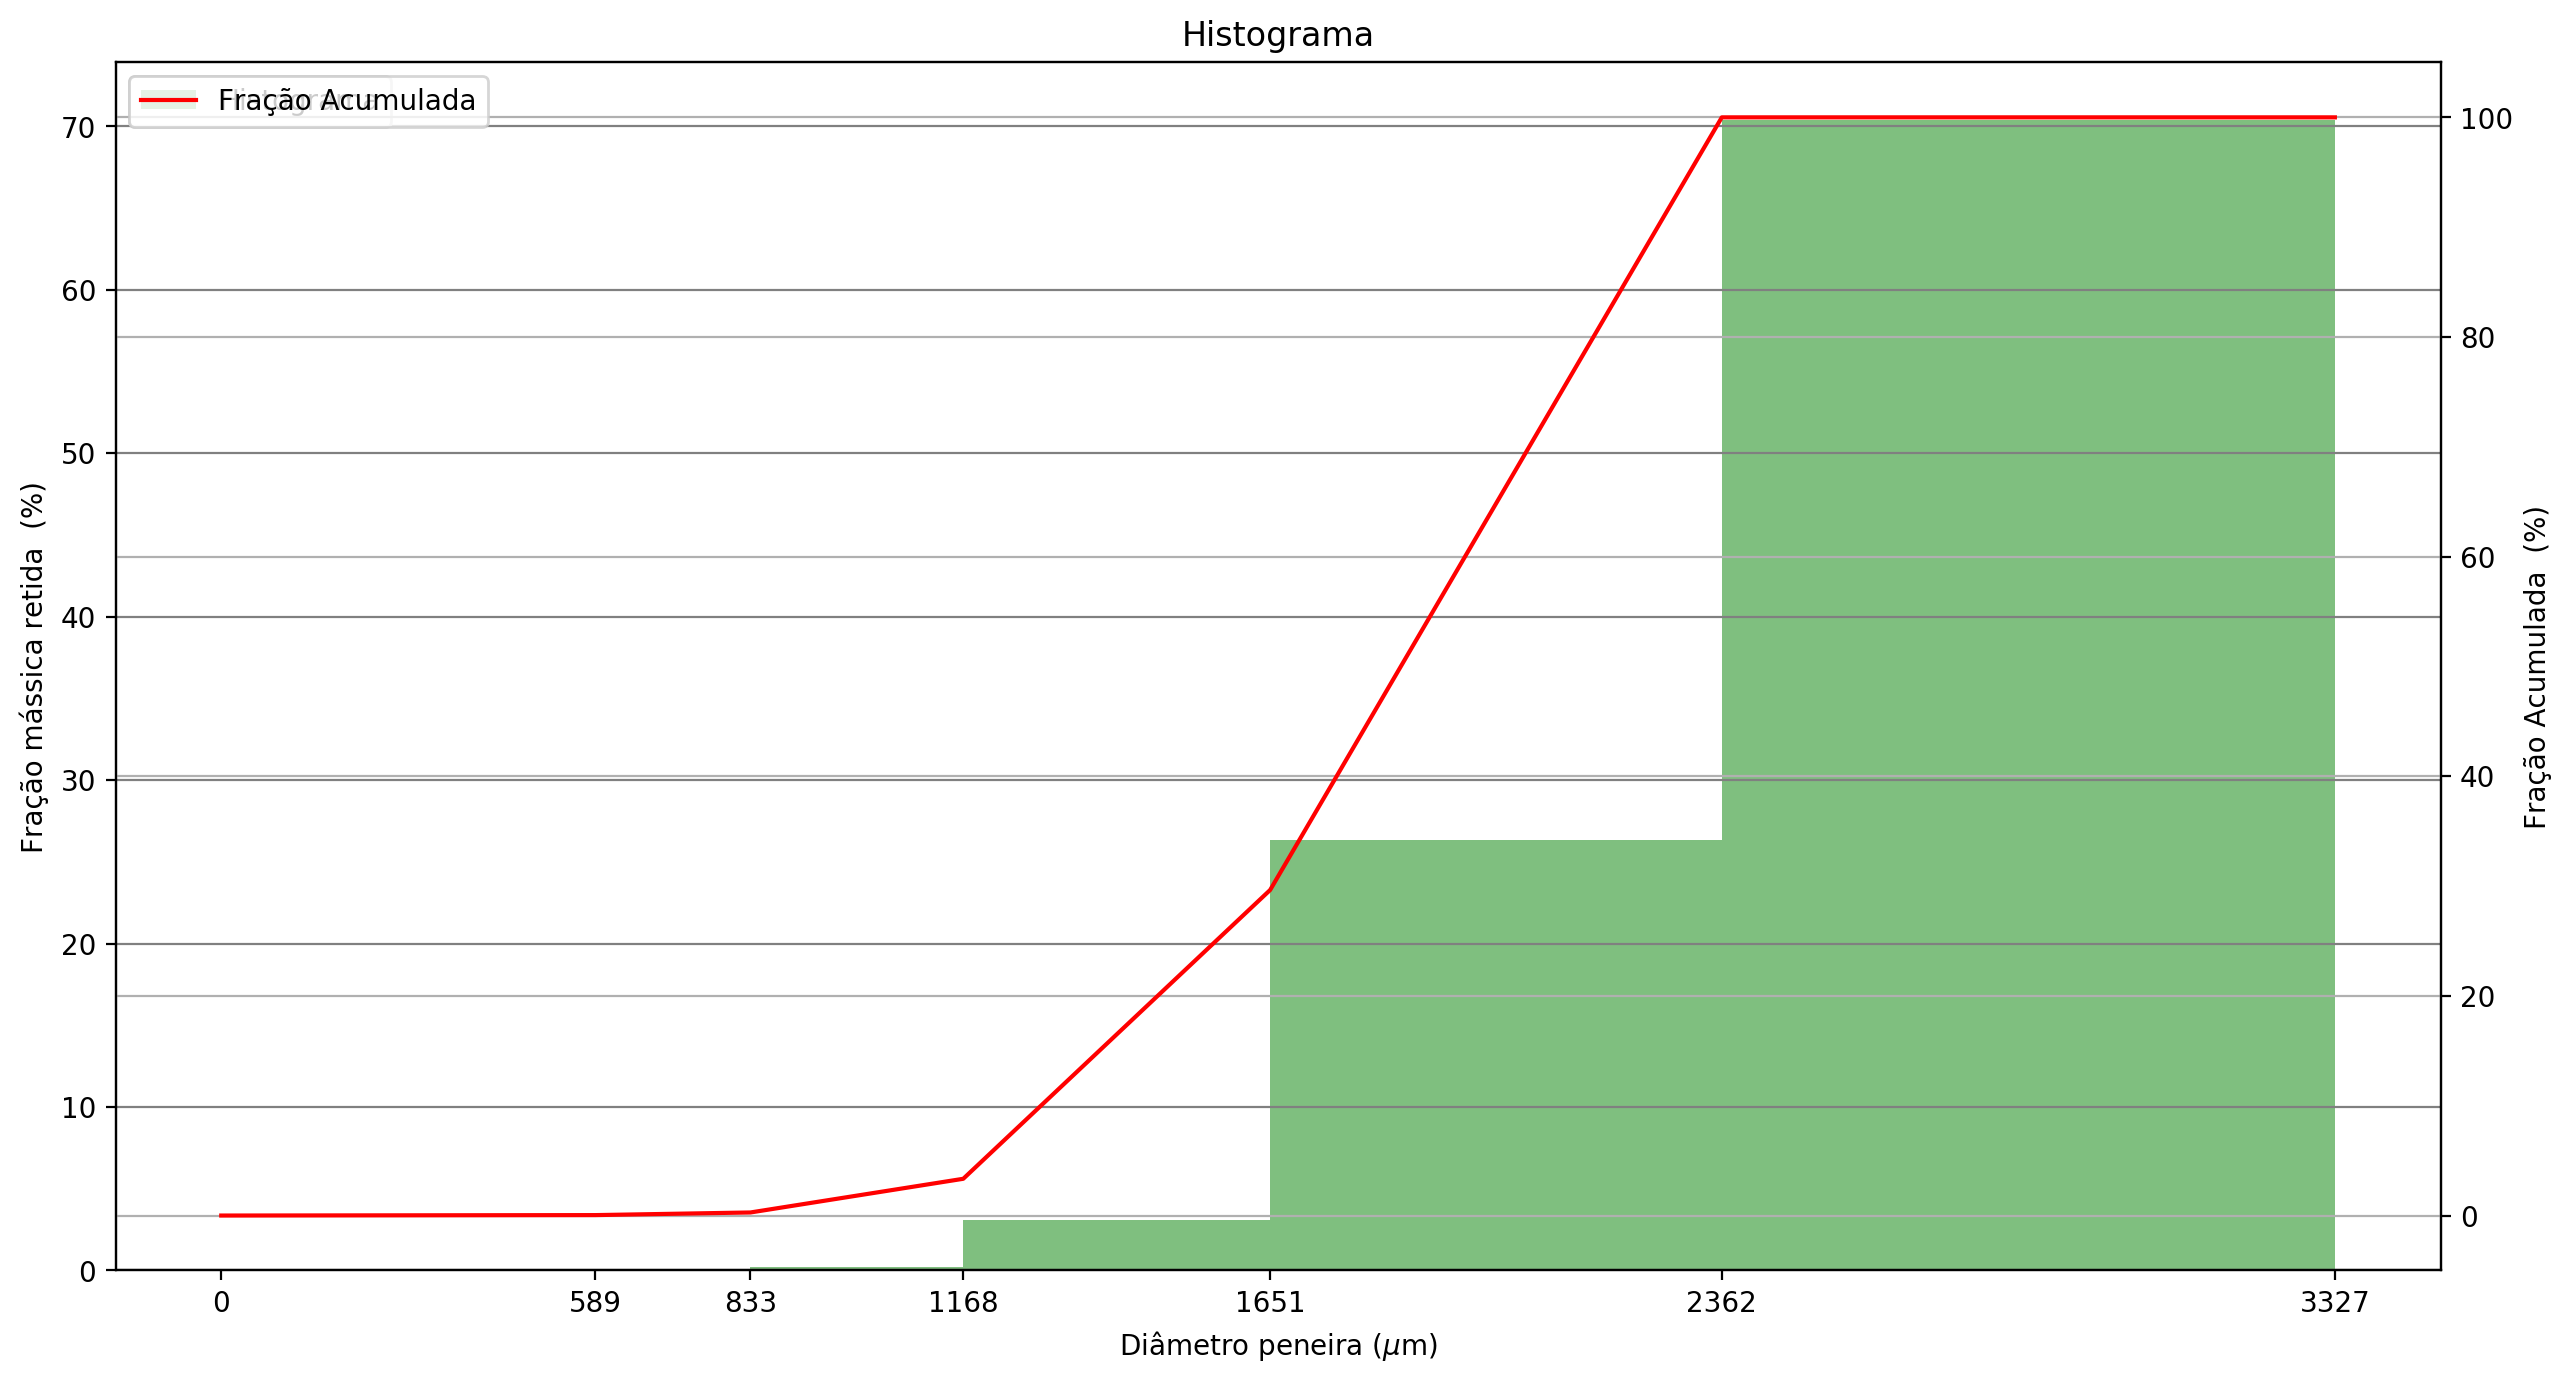

In [251]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = plt.axes()

# plt.xlim((math.ceil(0), math.floor(max(diametro_inferior))))
plt.xticks(diametro_inferior)
plt.hist(diametro_inferior, weights=x_i*100, bins=diametro_inferior[::-1],
         density=False, alpha = 0.5, color='green', label='Histograma')
plt.title('Histograma')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração mássica retida  (%)')

ax_bis = ax.twinx()
ax_bis.plot(diametro_inferior, X_i*100, color='red', label='Fração Acumulada')
plt.xticks(diametro_inferior)
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração Acumulada  (%)')
ax_bis.grid(True)
ax.grid(True, axis='y', color='gray')
ax_bis.legend()
ax.legend()
plt.show()

# Modelos

In [252]:
%matplotlib inline

In [253]:
# %matplotlib qt

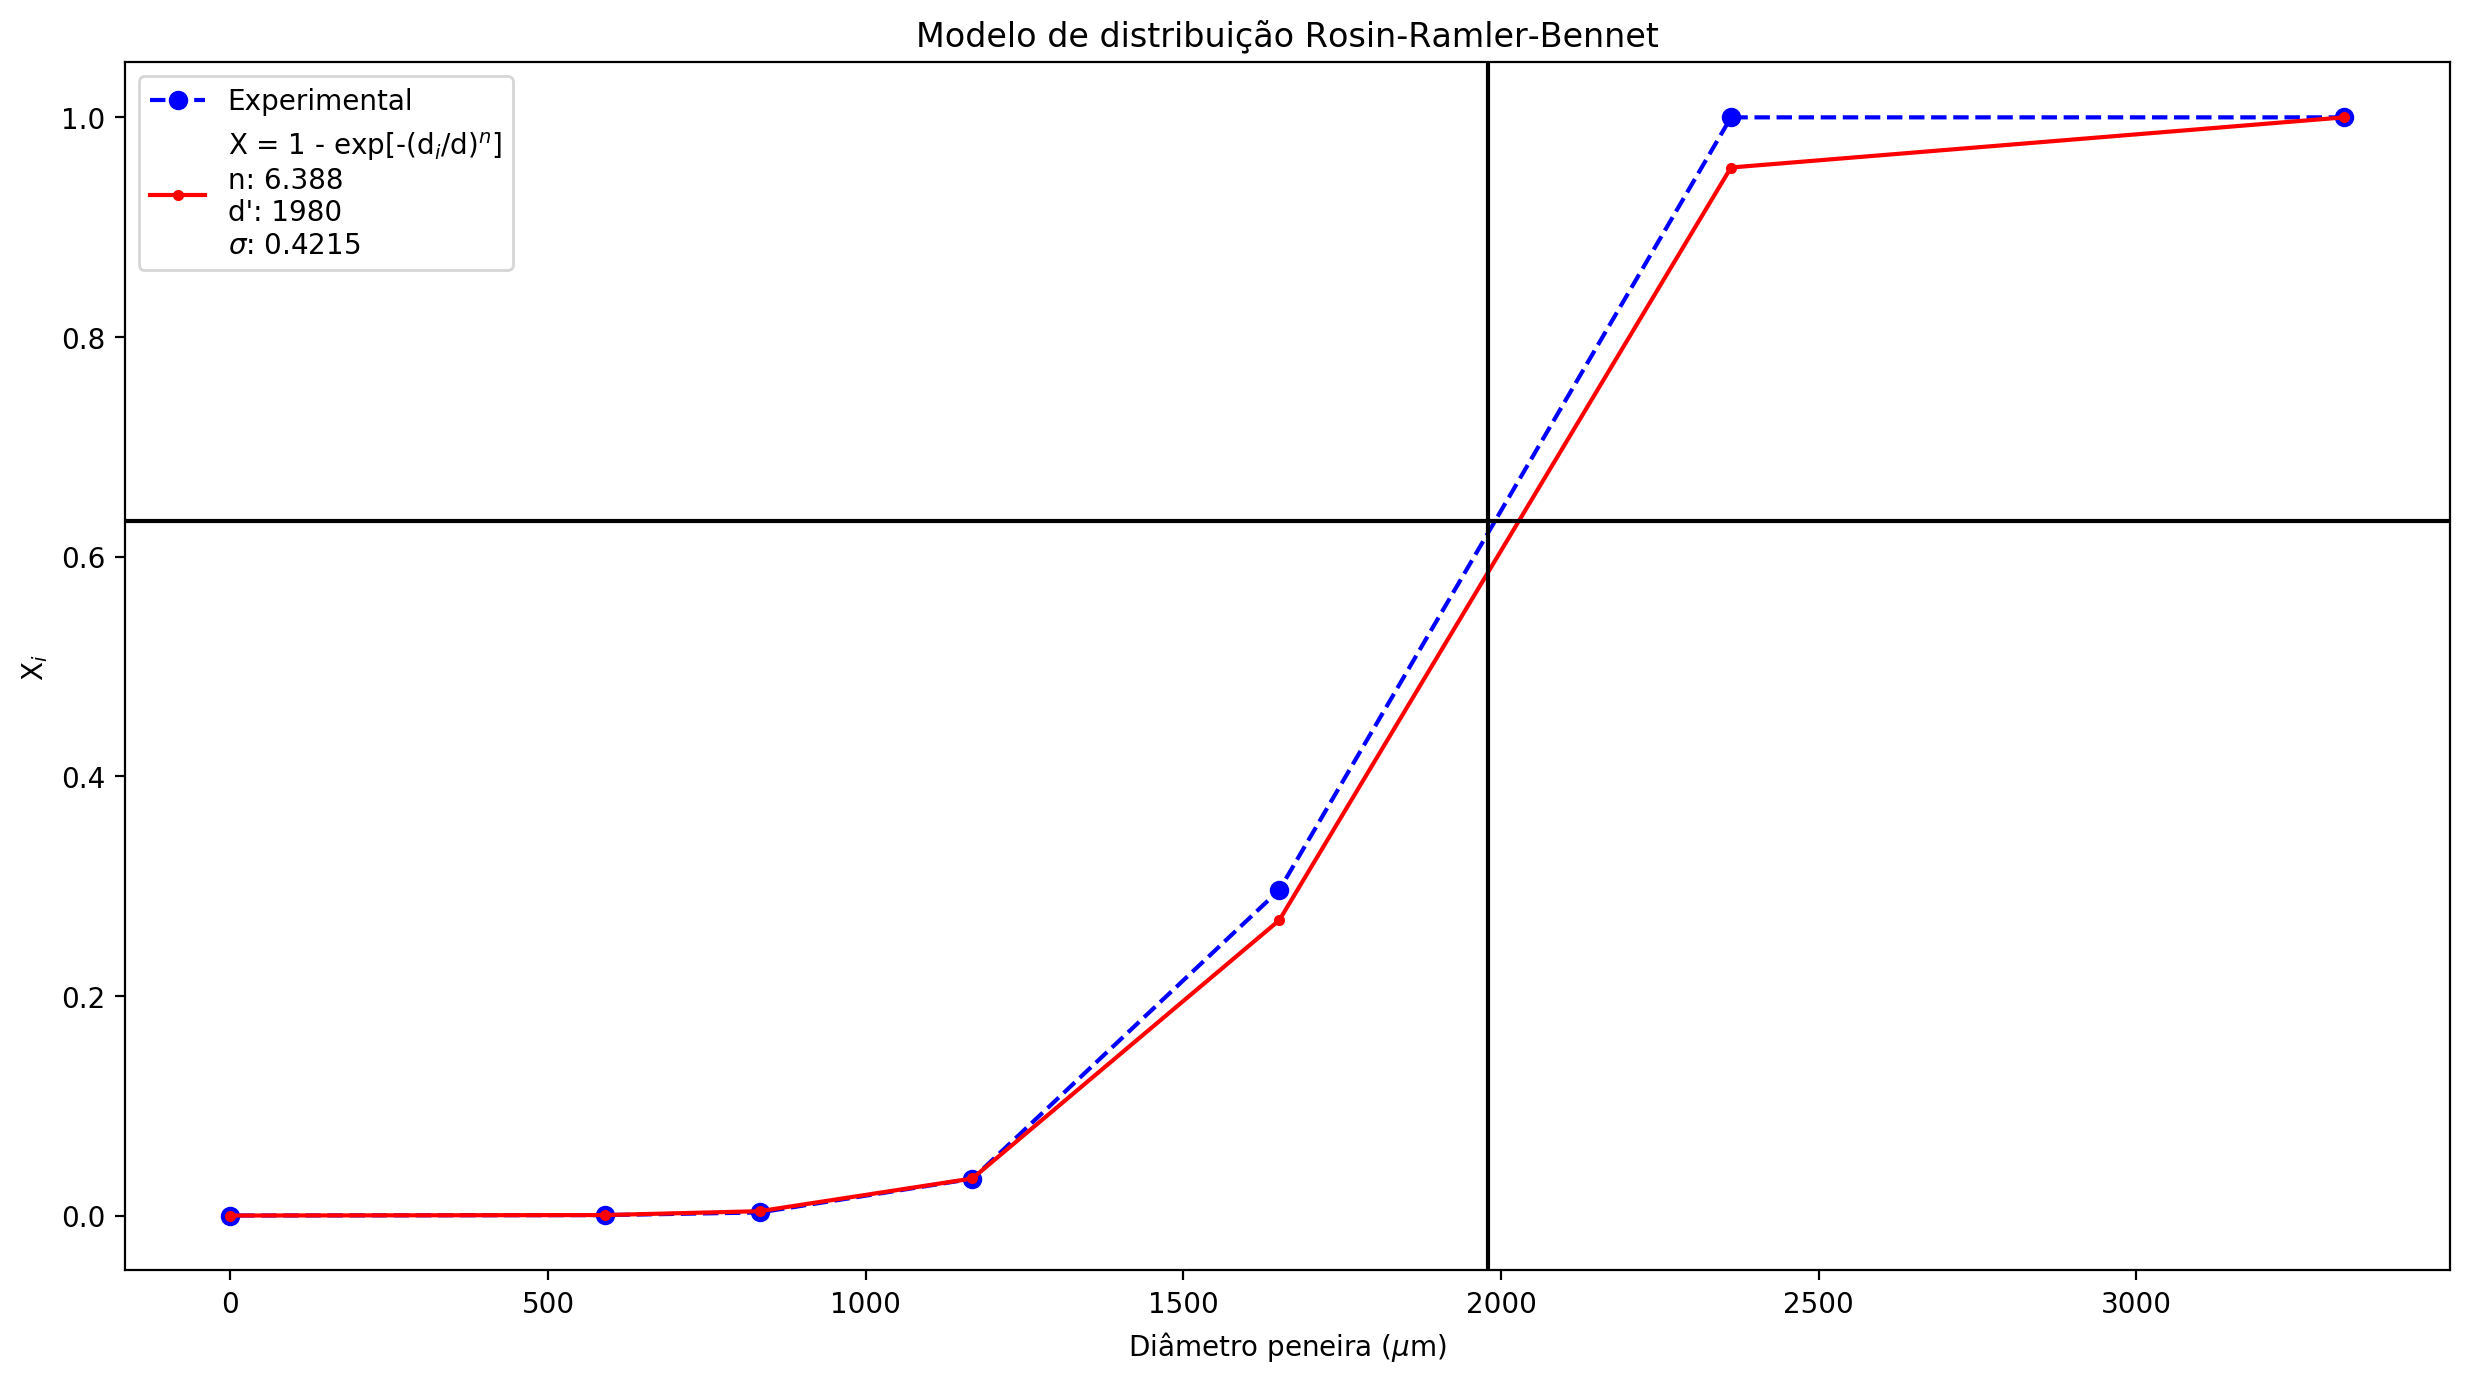

In [254]:
# d_linha = 1980
# d_linha = 4000
# d_linha = 3700

global d_linha
d_linha = 1980
# d_linha = 4000
# d_linha = 3700

def func(x, b):
    return 1 - np.exp(-(x/d_linha)**b)

xdata = diametro_inferior
ydata = X_i

fig = plt.figure(figsize=(15,8), dpi=200)

plt.plot(xdata, ydata, '--', label='Experimental', color='blue', marker='o')
popt, pcov = curve_fit(func, xdata, ydata)
n = popt[0]

# axis = np.linspace(min(xdata), max(xdata), 100)
axis = xdata

ax = plt.plot(axis, func(axis, *popt), 'r-',
    label=f"X = 1 - exp[-(d$_i$/d)$^n$]\nn: {popt[0]:5.4}\nd': {d_linha}\n$\sigma$: {np.sqrt(np.diag(pcov))[0]:5.4}",
    color='red', marker='.')

plt.title('Modelo de distribuição Rosin-Ramler-Bennet')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.axhline(0.632, color='black')
plt.axvline(d_linha,color='black')
plt.ylabel('X$_i$')
plt.legend()
plt.show()

In [255]:
soma1 = 0
soma3 = 0
for i in range(1,len(d_i)):
    soma1+= (x_i[i]/d_i[i])
    soma3+= (x_i[i]/d_i[i]**3)

In [256]:
d_sauter = 1/soma1
d_2 = soma1/soma3
d_3 = 1/soma3

# Propriedades do Fluido

In [257]:
# d_sauter = 3586.68*10**-6
d_sauter = d_sauter*10**-6
densi_gas = 1.116
temp = 43
# densi_part = 557.10
densi_part = 1217 #Aparente
g = 9.81
visc = 18*10**-6
esf = 0.35
# esf = 1
d_sauter*10**6

2479.712130340772

# Diâmetro de Sauter

In [258]:
print(f'Diâmetro de Sauter: {d_sauter*10**6:8.6} microns')

Diâmetro de Sauter:  2479.71 microns


# Características do Equipamento/leito

In [259]:
D_c = 0.25

In [260]:
Ar = (d_sauter**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
print(f'Arquimedes: {Ar:.9}')

Arquimedes: 626446.713


# Velocidade terminal

In [261]:
def find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81, err=0.0001):
    from math import exp
    i = 0
    u_old = 10*u_mf
    
    while i < 100:
        i += 1
        Re_p = ((d_p*u_old*densi_gas)/(visc))
        A = (1 + (8.1716*(exp(-4.0655*esf)))*Re_p**(0.0964+0.5565*esf)) 
        B = ((73.69*exp(-5.0748*esf)*Re_p)/(Re_p + 5.378*exp(6.2122*esf)))
        Cd= ((24/Re_p)*A + B)
        u_new = ((4*d_p*(densi_part-densi_gas)*g)/(3*densi_gas*Cd))**(1/2)
        
        dif = abs((u_new-u_old)/u_new)
        
        if dif < err:
#             print(Re_p)
            break
        u_old = u_new
    return u_new, Cd

In [262]:
Ks = {
    'Wen': (33.7, 0.0408),
    'Richardson': (25.7, 0.0365),
    'Saxena': (25.3, 0.0571),
    'Babu': (25.3, 0.0651),
    'Grace': (27.2, 0.0408),
    'Chitester': (28.7, 0.0494),
    'Tannous': (25.83, 0.043)
}

In [263]:
print(f'Número de Arquimedes: {Ar:10.8}')
print(f'Diâmetro utilizado: {d_sauter*10**6:8.6}')
print('Autor\t\tK1\tK2\t\tRe\t\tUₘ (m/s)\tUt (m/s)\tCd')
for autor in Ks:
    K1 = Ks[autor][0]
    K2 = Ks[autor][1]
    Re_pmf = ((K1)**2 + K2*Ar)**(1/2) - K1
    u_mf = ((Re_pmf * visc)/(d_sauter*densi_gas))
    u_t, cd = find_u_t(u_mf, d_sauter, densi_gas, visc, esf, g=9.81)
    if autor == 'Tannous':
        Umf = u_mf
    print(f'{autor:8}\t{K1}\t{K2}\t\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}\t{cd:.6}')

print(f'Velocidade mínima de fluidização (Tannous): {Umf:.6}')

Número de Arquimedes:  626446.71
Diâmetro utilizado:  2479.71
Autor		K1	K2		Re		Uₘ (m/s)	Ut (m/s)	Cd
Wen     	33.7	0.0408		 129.685	0.843524	 1.74596	11.5922
Richardson	25.7	0.0365		 127.681	0.830489	 1.74596	11.5922
Saxena  	25.3	0.0571		 165.515	 1.07657	 1.74596	11.5922
Babu    	25.3	0.0651		 178.223	 1.15924	 1.74596	11.5922
Grace   	27.2	0.0408		 134.969	0.877894	 1.74596	11.5922
Chitester	28.7	0.0494		 149.542	 0.97268	 1.74596	11.5922
Tannous 	25.83	0.043		 140.316	0.912669	 1.74596	11.5922
Velocidade mínima de fluidização (Tannous): 0.912669


In [264]:
Ufi = Umf*(1 - 0.49*np.exp(-0.22*n))
Ufc = Umf*(1 + 1.05*np.exp(-0.43*n))
Us = Umf*(1 + 0.56*np.exp(-1.09*n))
print(f'Ufi: {Ufi:5.4}\tUs:{Us:5.4}\tUfc:{Ufc:5.4}')

Ufi: 0.803	Us:0.9132	Ufc:0.9741


# Velocidade para cada diâmetro considerando polidispersa

In [265]:
Ufc_poli = 0 
print('Diâmetro\tFração\t\tRe\t\tUₘ (m/s)\tUt (m/s)')
for i in range(len(peneiras)-1):
    sup = peneiras[i]
#     print(sup)
    inf = peneiras[i+1]
    d_p = ((sup+inf)/2)*10**-6
    Ar = (d_p**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
    Re_pmf = ((25.83)**2 + 0.043*Ar)**(1/2) - 25.83
    u_mf = ((Re_pmf * visc)/(d_p*densi_gas))
    u_t, cd = find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81)
    Ufc_poli += x_i[i]*u_mf
    
    print(f'{d_p*10**6:8.6}\t{x_i[i]*100:8.5} %\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}')

Diâmetro	Fração		Re		Uₘ (m/s)	Ut (m/s)
  2844.5	     0.0 %	 177.461	 1.00625	 1.85717
  2006.5	  70.387 %	 96.3935	0.774849	 1.59055
  1409.5	  26.305 %	 49.0981	0.561833	 1.36815
  1000.5	   3.069 %	 23.5307	0.379338	 1.18443
   711.0	 0.23914 %	 10.2555	0.232647	 1.01703
   294.5	0.039857 %	0.859185	0.0470554	0.552301


In [266]:
print(f'Ufc_poli: {Ufc_poli:5.4}')

Ufc_poli: 0.7054


# Resultados

In [267]:
Ufc_poli = 0 
print('Diâmetro\tFração\t\tCumulativo\tRe\t\tUₘ (m/s)\tUt (m/s)')
for i in range(len(peneiras)-1):
    sup = peneiras[i]
#     print(sup)
    inf = peneiras[i+1]
    d_p = ((sup+inf)/2)*10**-6
    Ar = (d_p**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
    Re_pmf = ((25.83)**2 + 0.043*Ar)**(1/2) - 25.83
    u_mf = ((Re_pmf * visc)/(d_p*densi_gas))
    u_t, cd = find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81)
    Ufc_poli += x_i[i]*u_mf
    
    print(f'{d_p*10**6:8.6}\t{x_i[i+1]*100:8.5} %\t{X_i[i+1]*100:8.5} %\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}')

print('\n\n\n\n\n\n')

print(f'Número de Arquimedes: {Ar:10.8}')
print(f'Diâmetro utilizado: {d_sauter*10**6:8.6}')
print('Autor\t\tK1\tK2\t\tRe\t\tUₘ (m/s)\tUt (m/s)\tCd')
for autor in Ks:
    K1 = Ks[autor][0]
    K2 = Ks[autor][1]
    Re_pmf = ((K1)**2 + K2*Ar)**(1/2) - K1
    u_mf = ((Re_pmf * visc)/(d_sauter*densi_gas))
    u_t, cd = find_u_t(u_mf, d_sauter, densi_gas, visc, esf, g=9.81)
    if autor == 'Tannous':
        Umf = u_mf
    print(f'{autor:8}\t{K1}\t{K2}\t\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}\t{cd:.6}')

print(f'Velocidade mínima de fluidização (Tannous): {Umf:.6}')



print('\n\n\n\n\n\n')
Ufi = Umf*(1 - 0.49*np.exp(-0.22*n))
Ufc = Umf*(1 + 1.05*np.exp(-0.43*n))
Us = Umf*(1 + 0.56*np.exp(-1.09*n))
print(f'Ufi: {Ufi:5.4}\tUs:{Us:5.4}\tUfc:{Ufc:5.4}')
print('\n\n\n\n\n\n')

print(f'Ufc_poli: {Ufc_poli:5.4}')

Diâmetro	Fração		Cumulativo	Re		Uₘ (m/s)	Ut (m/s)
  2844.5	  70.387 %	   100.0 %	 177.461	 1.00625	 1.85717
  2006.5	  26.305 %	  29.641 %	 96.3935	0.774849	 1.59055
  1409.5	   3.069 %	  3.3466 %	 49.0981	0.561833	 1.36815
  1000.5	 0.23914 %	 0.27888 %	 23.5307	0.379338	 1.18443
   711.0	0.039857 %	0.039841 %	 10.2555	0.232647	 1.01703
   294.5	     0.0 %	     0.0 %	0.859185	0.0470554	0.552301







Número de Arquimedes:  1049.3883
Diâmetro utilizado:  2479.71
Autor		K1	K2		Re		Uₘ (m/s)	Ut (m/s)	Cd
Wen     	33.7	0.0408		0.629361	0.00409362	 1.74596	11.5923
Richardson	25.7	0.0365		0.734687	0.0047787	 1.74596	11.5923
Saxena  	25.3	0.0571		  1.1577	0.00753016	 1.74597	11.5922
Babu    	25.3	0.0651		 1.31588	0.00855902	 1.74596	11.5922
Grace   	27.2	0.0408		0.775973	0.00504723	 1.74596	11.5923
Chitester	28.7	0.0494		0.889353	0.0057847	 1.74596	11.5923
Tannous 	25.83	0.043		0.859185	0.00558848	 1.74596	11.5923
Velocidade mínima de fluidização (Tannous): 0.00558848







Ufi: 0.004917	Us:

# Todas as peneiras

# Peneiras Maiores

# Peneiras Menores

In [291]:
# Imergíveis
# Emergíveis

di =(6680+4699)/2

xi = .59
de = (3327+2362)/2

xe = .41

In [292]:
R0 = xi*densi_part + xe*densi_part
R1 = xi*densi_part*di + xe*densi_part*de

densi_med = densi_part

dm = di*de*(R0/R1)

Ar = (dm**3) * densi_gas * (densi_med - densi_gas) * g/(visc**2)

T_Uma = (visc/(dm*densi_med))*((19.2**2 + 0.032*Ar)**0.5 -19.9)
T_Uma
# dm

1.014428423386739

In [305]:
# Imergíveis
# Emergíveis

di =(6680+4699)/2
di = di*10**-6

xi = .59


de = (3327+2362)/2
de = de*10**-6

xe = .41

In [306]:
# Mais pessado é o I


M0 = xi*densi_part + xe*densi_part
M1 =  xe*densi_part*di + xi*densi_part*de

densi_med = densi_part

dm = di*de*(M0/M1)

Ar = (dm**3) * densi_gas * (densi_med - densi_gas) * g/(visc**2)

M_Uma = (visc/(dm*densi_med))*((5.52*10**-4 )* (Ar**1.044))
M_Uma
# Ar
# M0
# M1
# dm

0.01047704445358187

![Eq Arroz Ufa](eq_arroz_ufa.png)
Não sei onde conseguir os dados de M e "b"